In [1]:
# Check GPU type
!nvidia-smi

Wed Aug 24 21:59:57 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   60C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

### KERAS TRANSFER LEARNING WITH LEAF PROJECT

In [ ]:
# Connect Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Change current directory to Google Drive
%cd /content/drive/MyDrive/

/content/drive/MyDrive


### Dataset operations

In [ ]:
# Install zip and unzip
!apt-get install -y zip unzip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
zip is already the newest version (3.0-11build1).
unzip is already the newest version (6.0-21ubuntu1.1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.


In [ ]:
!mkdir -p /root/WORKSPACE

In [ ]:
# Copy Zips into Workspace
!cp /content/drive/MyDrive/Datasets/combined_train.zip /root/WORKSPACE
!cp /content/drive/MyDrive/Datasets/combined_valid.zip /root/WORKSPACE

In [ ]:
!unzip /root/WORKSPACE/combined_train.zip
!unzip /root/WORKSPACE/combined_valid.zip

In [ ]:
!mkdir -p /root/WORKSPACE/whole_dataset
!mv -v root/WORKSPACE/tomamto_op/combined_train/* /root/WORKSPACE/whole_dataset/
!mv -v root/WORKSPACE/tomamto_op/combined_valid/* /root/WORKSPACE/whole_dataset/

In [ ]:
# Rezip
%cd /root/WORKSPACE/whole_dataset/
!zip -r /root/whole_dataset.zip . *
%cd -

In [ ]:
!cp /root/whole_dataset.zip Datasets/

In [ ]:
!mv /Datasets/whole_dataset.zip /Datasets/test/xd.zip

mv: cannot stat '/Datasets/whole_dataset.zip': No such file or directory


In [ ]:
%cd Datasets

/content/drive/MyDrive/Datasets


In [ ]:
!ls

combined_train.zip  combined_valid.zip	tomato.zip  whole_dataset.zip


### DATASET TEST

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import pathlib
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from keras.layers import Dense, Flatten

In [2]:
dataset_url = "https://transfer.sh/YwG6Wf/tomato_dataset.tgz"

In [3]:
data_dir = tf.keras.utils.get_file('tomato_dataset', origin=dataset_url, untar=True)

231702528/231691341 [==============================] - 362s 2us/step


In [4]:
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('/root/.keras/datasets/tomato_dataset')

In [5]:
# Delete Spotlight Indecies
%cd /root/.keras/datasets/tomato_dataset/
!find . -name '._*' -type f -delete
%cd -

/root/.keras/datasets/tomato_dataset
/content


In [6]:
# Delete Spotlight Indecies
%cd /root/.keras/datasets/tomato_dataset/
!find . -name '.DS_*' -type f -delete
%cd -

/root/.keras/datasets/tomato_dataset
/content


In [7]:
!ls -la /root/.keras/datasets/tomato_dataset/


total 2124
drwxr-xr-x 12  501 staff   4096 Aug 24 22:09 .
drwxr-xr-x  3 root root    4096 Aug 24 22:09 ..
drwxr-xr-x  2  501 staff 212992 Aug 24 22:09 bacterial_spot
drwxr-xr-x  2  501 staff 212992 Aug 24 22:09 curl_virus
drwxr-xr-x  2  501 staff 229376 Aug 24 22:09 early_blight
drwxr-xr-x  2  501 staff 176128 Aug 24 22:09 healty
drwxr-xr-x  2  501 staff 229376 Aug 24 22:09 late_blight
drwxr-xr-x  2  501 staff 200704 Aug 24 22:09 leaf_mold
drwxr-xr-x  2  501 staff 212992 Aug 24 22:09 mosaic_virus
drwxr-xr-x  2  501 staff 233472 Aug 24 22:09 septoria_leaf_spot
drwxr-xr-x  2  501 staff 233472 Aug 24 22:09 spider_mite
drwxr-xr-x  2  501 staff 225280 Aug 24 22:09 target_spot


In [ ]:
# Compress the cleaned dataset into tar.gz
%cd /root/.keras/datasets/tomato_dataset/
!tar -cvzf /root/tomato_dataset.tgz . *
%cd -

In [ ]:
!curl --upload-file /root/tomato_dataset.tgz https://transfer.sh/tomato_dataset.tgz

In [8]:
img_size = (256, 256)
batch_size=32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  label_mode="categorical",
  image_size=img_size,
  batch_size=batch_size)

Found 18748 files belonging to 10 classes.
Using 14999 files for training.


In [9]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  label_mode="categorical",
  image_size=img_size,
  batch_size=batch_size)

Found 18748 files belonging to 10 classes.
Using 3749 files for validation.


In [10]:
class_names = train_ds.class_names
print(class_names)

['bacterial_spot', 'curl_virus', 'early_blight', 'healty', 'late_blight', 'leaf_mold', 'mosaic_virus', 'septoria_leaf_spot', 'spider_mite', 'target_spot']


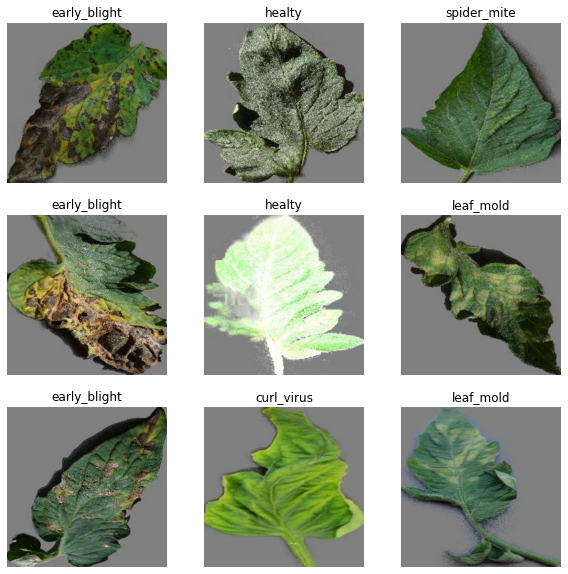

In [11]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        title = class_names[labels[i].numpy().tolist().index(1)]
        plt.title(title)
        plt.axis("off")

In [14]:
vgg16_model = Sequential()

pretrained_model= tf.keras.applications.VGG16(include_top=False,
                   input_shape=(256,256,3),
                   pooling='avg',classes=10,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

vgg16_model.add(pretrained_model)

58900480/58889256 [==============================] - 0s 0us/step


In [15]:
vgg16_model.add(Flatten())
vgg16_model.add(Dense(50, activation='relu'))
vgg16_model.add(Dense(20, activation='relu'))
vgg16_model.add(Dense(10, activation='softmax'))

In [16]:
vgg16_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 512)               14714688  
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 50)                25650     
                                                                 
 dense_1 (Dense)             (None, 20)                1020      
                                                                 
 dense_2 (Dense)             (None, 10)                210       
                                                                 
Total params: 14,741,568
Trainable params: 26,880
Non-trainable params: 14,714,688
_________________________________________________________________


In [17]:
vgg16_model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

history = vgg16_model.fit(train_ds, validation_data=val_ds, epochs=5)

Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


469/469 [==============================] - 132s 250ms/step - loss: 1.0699 - accuracy: 0.6310 - val_loss: 0.5753 - val_accuracy: 0.8149
Epoch 2/5
469/469 [==============================] - 116s 247ms/step - loss: 0.4750 - accuracy: 0.8397 - val_loss: 0.5010 - val_accuracy: 0.8357
Epoch 3/5
469/469 [==============================] - 116s 246ms/step - loss: 0.3454 - accuracy: 0.8830 - val_loss: 0.3681 - val_accuracy: 0.8781
Epoch 4/5
469/469 [==============================] - 116s 246ms/step - loss: 0.2901 - accuracy: 0.9001 - val_loss: 0.4095 - val_accuracy: 0.8685
Epoch 5/5
469/469 [==============================] - 115s 246ms/step - loss: 0.2409 - accuracy: 0.9150 - val_loss: 0.3111 - val_accuracy: 0.8938


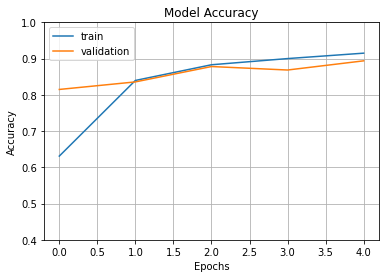

In [18]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [19]:
vgg16_model.save('/root/vgg16_model_five.h5')

In [20]:
!ls -lh /root/

total 57M
-rw-r--r-- 1 root root 57M Aug 24 22:24 vgg16_model_five.h5


In [21]:
import requests
from PIL import Image
from io import BytesIO

In [30]:
# response = requests.get(r"https://image.shutterstock.com/image-photo/tomato-leaf-isolated-on-white-260nw-580281301.jpg")
# response = requests.get(r"https://extension.umaine.edu/ipm/wp-content/uploads/sites/44/2021/06/Early-Blight-on-Tomato-2_JimDill.jpg")
# url = r"http://ephytia.inra.fr/en/I/28271/ToLCNDV4"

url = r"https://blogs.cornell.edu/livegpath/files/2021/02/leaf_mold_tomato1x1200.jpg"
response = requests.get(url)

img = Image.open(BytesIO(response.content)).resize(img_size).convert('RGB')
img = np.expand_dims(img, axis=0)

In [31]:
pred=vgg16_model.predict(img)
output_class=class_names[np.argmax(pred)]
print("The predicted class is", output_class)

The predicted class is early_blight
